# Single Sequence Secondary Protein Structure Prediction

#### Data Exploration

In [ ]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
file_path = '/content/drive/My Drive/XAI Paper/Data Sets/test_secondary_structure_cb513.csv'
df = pd.read_csv(file_path)

In [ ]:
df['seq_len'] = df['seq'].apply(len)

Generating a histogram to display the distribution of protein sequence lengths, incorporating a Kernel Density Estimate (KDE) line to illustrate probability density and highlight common sequence length ranges, providing insights into the dataset's overall length distribution.

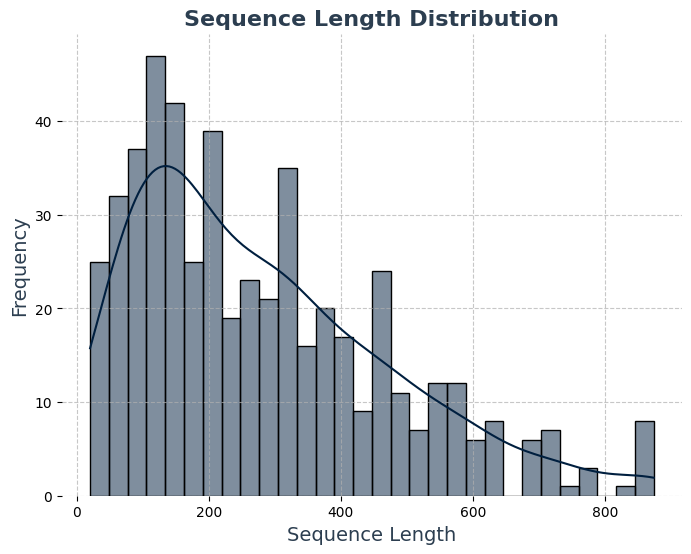

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.histplot(df['seq_len'], bins=30, kde=True, color='#001f3f')  # Indigo deep purple
plt.title('Sequence Length Distribution', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel('Sequence Length', fontsize=14, color='#2C3E50')
plt.ylabel('Frequency', fontsize=14, color='#2C3E50')

plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.show()


Visualizing the amino acid diversity by concatenating all protein sequences into a single string, counting the occurrences of each amino acid using a Counter, and converting these counts into a DataFrame for plotting. A bar graph is generated to display the frequency of each amino acid, using a color palette to enhance the visual representation of the data, thereby providing insights into the distribution and diversity of amino acids within the dataset.

<ipython-input-44-e9c55905bfdf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='count', data=aa_df, palette='viridis')


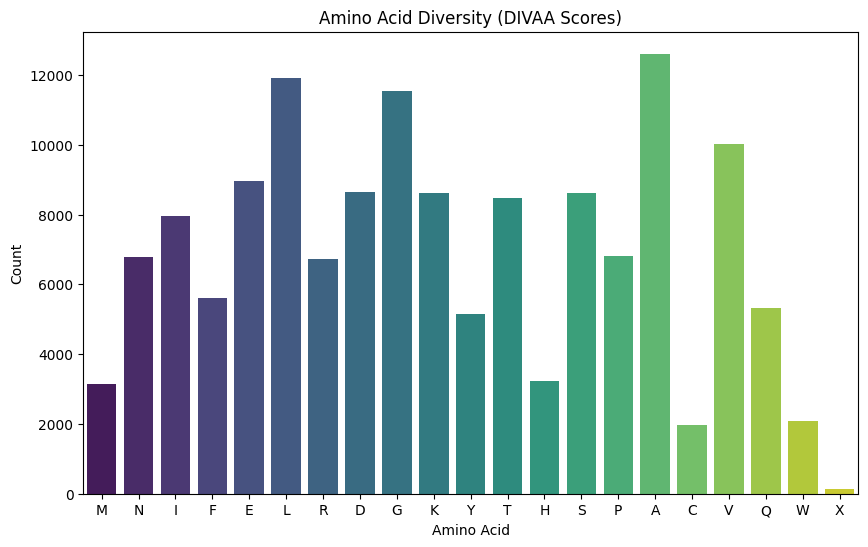

In [ ]:
all_sequences = ''.join(df['seq'].values)
aa_counts = Counter(all_sequences)

aa_df = pd.DataFrame.from_dict(aa_counts, orient='index', columns=['count']).reset_index()
aa_df = aa_df.rename(columns={'index': 'Amino Acid'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Amino Acid', y='count', data=aa_df, palette='viridis')
plt.title('Amino Acid Diversity (DIVAA Scores)')
plt.xlabel('Amino Acid')
plt.ylabel('Count')
plt.show()

Visualizing the distribution of DSSP8 classifications by concatenating all DSSP8 class annotations from the dataset into a single string and counting the occurrences of each class using a Counter. The counts are converted into a DataFrame for plotting, and a bar chart is generated to display the frequency of each DSSP8 class, utilizing a color palette to enhance the visual appeal. This approach provides insights into the distribution of secondary structure classifications within the dataset.

<ipython-input-45-f22804584103>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DSSP8 Class', y='count', data=sst8_df, palette='magma')


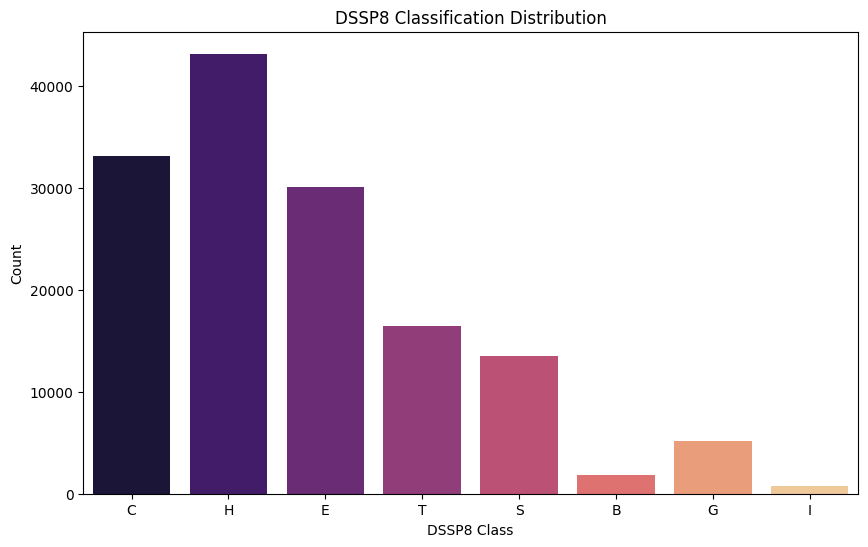

In [ ]:
all_sst8 = ''.join(df['sst8'].values)
sst8_counts = Counter(all_sst8)

# Convert counts to a dataframe for plotting
sst8_df = pd.DataFrame.from_dict(sst8_counts, orient='index', columns=['count']).reset_index()
sst8_df = sst8_df.rename(columns={'index': 'DSSP8 Class'})

# Plot bar chart for DSSP8 classification distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='DSSP8 Class', y='count', data=sst8_df, palette='magma')
plt.title('DSSP8 Classification Distribution')
plt.xlabel('DSSP8 Class')
plt.ylabel('Count')
plt.show()

Creating a flowchart to summarize the preprocessing workflow, including dataset input, sequence length distribution, amino acid diversity analysis, DSSP8 classification, trimming, quality filtering, and preprocessing steps like tokenization and padding for an optimized dataset ready for modeling.

In [ ]:
from graphviz import Digraph
flowchart = Digraph(format='png')

flowchart.node('Start', 'Dataset Input')
flowchart.node('Step1', 'Compute Sequence Length Distribution')
flowchart.node('Step1_1', 'Analyze Distribution (Normal Curve, Deviations, Quality Issues)')
flowchart.node('Step1_2', 'Trim Sequences, Perform Quality Filtering')


flowchart.node('Step2', 'Analyze Amino Acid Diversity (DIVAA Scores)')
flowchart.node('Step2_1', 'Evaluate Spread, Frequency, Biophysical Properties')
flowchart.node('Step2_2', 'Identify Rare Variants and Hotspot Regions')


flowchart.node('Step3', 'DSSP8 Classification for Secondary Structures')
flowchart.node('Step3_1', 'Visualize Distribution of DSSP8 Annotations (Balance vs. Skew)')
flowchart.node('Step3_2', 'Adjust for Biases')


flowchart.node('Step4', 'Preprocessing Steps (Trimming, Normalization, Feature Engineering)')
flowchart.node('Step4_1', 'Remove Null Values, Convert Sequences to Uppercase')
flowchart.node('Step4_2', 'Tokenization and Numerical Representation')
flowchart.node('Step4_3', 'Padding Techniques (Post-padding Preferred)')

flowchart.node('End', 'Optimized Dataset Ready for Model Development')


flowchart.edges([
    ('Start', 'Step1'),
    ('Step1', 'Step1_1'),
    ('Step1_1', 'Step1_2'),
    ('Step1_2', 'Step2'),
    ('Step2', 'Step2_1'),
    ('Step2_1', 'Step2_2'),
    ('Step2_2', 'Step3'),
    ('Step3', 'Step3_1'),
    ('Step3_1', 'Step3_2'),
    ('Step3_2', 'Step4'),
    ('Step4', 'Step4_1'),
    ('Step4_1', 'Step4_2'),
    ('Step4_2', 'Step4_3'),
    ('Step4_3', 'End')
])


flowchart.render('preprocessing_workflow', format='png', cleanup=True)


flowchart.view()


'preprocessing_workflow.png'

### Model 1 - Sequence Processing Predictor
model is composed of the following layers:

###### 1. An Embedding layer that is capable of processing sequences with a length of 1723 and that transforms each token into a 64-dimensional vector. The total number of parameters for this layer is given by the product of the number of tokens in the vocabulary and the embedding dimension.

###### 2. A Bidirectional LSTM layer which duplicates the LSTM layer to process the data in both directions. The LSTM itself has an output size of 64 units, but because it's bidirectional, the output is doubled to 128. The number of parameters in an LSTM is calculated using the formula 4 * ((size_of_input + 1) * size_of_output + size_of_output^2), where the size_of_input is the output dimension of the previous layer (64) and size_of_output is the number of LSTM units. However, since the actual parameter count is given, it indicates the layer's complexity without needing to break down the calculation.

###### 3. A Dense layer that outputs a vector of size 10 for each of the 1723 positions in the sequence, indicating the probability distribution over 10 possible classes for each position. The number of parameters for this layer is the product of the output size of the previous layer (128) and the size of the output (10), plus the bias terms for each output neuron (10).

Architecture:

| Layer (type)                      | Output Shape         | Param # |
|-----------------------------------|----------------------|---------|
| embedding (Embedding)             | (None, 1723, 64)     | 1,728   |
| bidirectional (Bidirectional LSTM)| (None, 1723, 128)    | 66,048  |
| dense (Dense)                     | (None, 1723, 10)     | 1,290   |
| Total params: 69,066                                         |
| Trainable params: 69,066                                     |
| Non-trainable params: 0                                      |


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed, Bidirectional

# Defining the LSTM model
model_1 = Sequential()
model_1.add(Embedding(input_dim=len(aa_tokenizer.word_index) + 1, output_dim=64, input_length=max_seq_length))
model_1.add(Bidirectional(LSTM(64, return_sequences=True)))
model_1.add(Dense(len(dssp8_tokenizer.word_index) + 1, activation='softmax'))


model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
tf.random.set_seed(42)


callbacks_model_1 = setup_callbacks(
    val_dataset = val_dataset,
    dssp8_tokenizer=dssp8_tokenizer,
    initial_lr=0.0001,
    warmed_lr=0.001,
    warmup_epochs=5
)


history_model_1 = model_1.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=callbacks_model_1
)

Epoch 1/10
1/1 [==============================] - 0s 59ms/step

Epoch 1, Mean ROUGE-L: 0.35244219212763583
235/235 [==============================] - 45s 171ms/step - loss: 0.9528 - accuracy: 0.8373 - val_loss: 0.2929 - val_accuracy: 0.9090 - mean_rouge_l: 0.3524
Epoch 2/10
1/1 [==============================] - 0s 55ms/step

Epoch 2, Mean ROUGE-L: 0.326631470393679
235/235 [==============================] - 39s 166ms/step - loss: 0.2499 - accuracy: 0.9149 - val_loss: 0.2220 - val_accuracy: 0.9159 - mean_rouge_l: 0.3266
Epoch 3/10
1/1 [==============================] - 0s 55ms/step

Epoch 3, Mean ROUGE-L: 0.3758283209163642
235/235 [==============================] - 39s 167ms/step - loss: 0.2158 - accuracy: 0.9170 - val_loss: 0.2105 - val_accuracy: 0.9186 - mean_rouge_l: 0.3758
Epoch 4/10
1/1 [==============================] - 0s 58ms/step

Epoch 4, Mean ROUGE-L: 0.5884694870811082
235/235 [==============================] - 47s 201ms/step - loss: 0.2004 - accuracy: 0.9260 - val_loss: 0

In [ ]:
model_1.save('model_1.h5')
files.download('model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

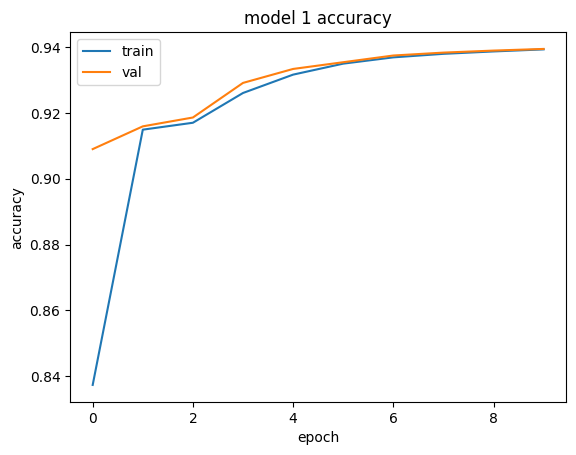

In [ ]:
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

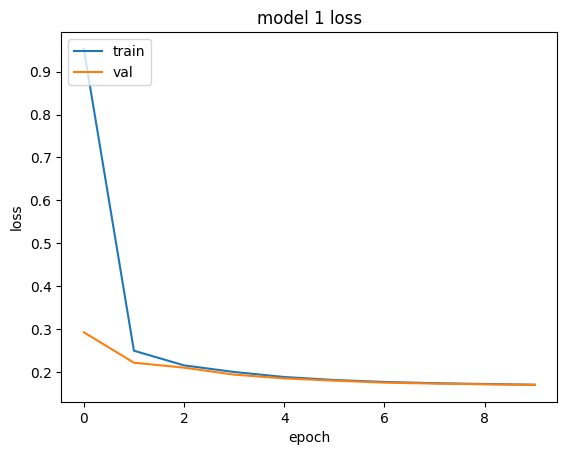

In [ ]:
plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

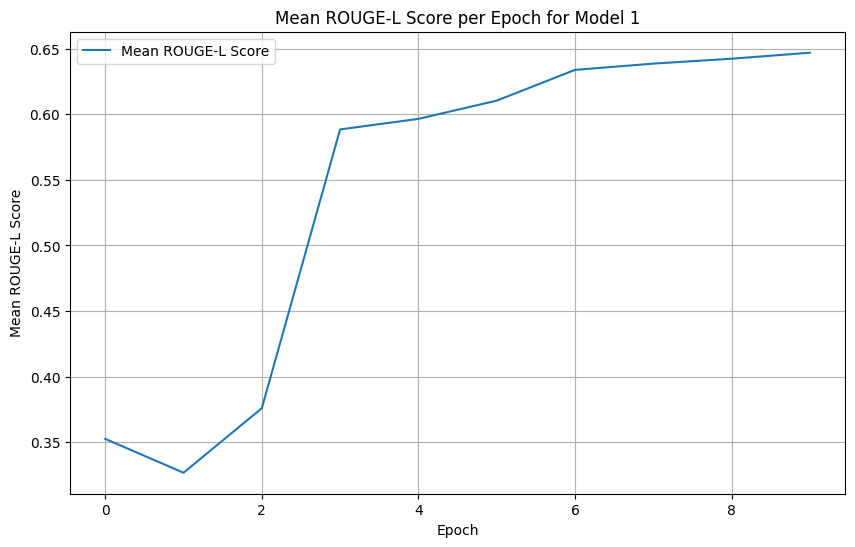

In [ ]:
# Access the logged mean ROUGE-L scores
mean_rouge_l_scores = history_model_1.history['mean_rouge_l']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_rouge_l_scores, label='Mean ROUGE-L Score')
plt.title('Mean ROUGE-L Score per Epoch for Model 1')
plt.xlabel('Epoch')
plt.ylabel('Mean ROUGE-L Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_sequences = input_sequences_padded[:10]

# Make predictions
predictions_model_1 = model_1.predict(input_sequences)
predicted_classes_model_1 = np.argmax(predictions_model_1, axis=-1)

predicted_labels_model_1 = [''.join([dssp8_tokenizer.index_word.get(i, '') for i in pred]) for pred in predicted_classes_model_1]

true_labels = df['dssp8'][:10].tolist()

# Print comparisons
for i, (true, pred) in enumerate(zip(true_labels, predicted_labels_model_1)):
    print(f"Entry {i+1}:")
    print(f"True Labels: {true}")
    print(f"Predicted Labels: {pred}")
    print("-" * 50)


1/1 [==============================] - 0s 72ms/step
Entry 1:
True Labels: CEEEEEEHHHHHHHHHHHHHHSCSCCSSTTTTEEEEEECSSEEEEEEECSSEEEEEEEECEEESCCCEEEEHHHHHHHHHHCCSSEEEEEEETTEEEEEETTEEEEEECCCGGGSPPPCCCCCCCEEEEHHHHHHHHHHHGGGCCTTCSSGGGGEEEEEEETTEEEEEEESSSSEEEEEEECBCCCCCEEEEHHHHHHHHHHCCSSEEEEEECSSEEEEECSSEEEEEECCCSPPPCGGGGSCCCCCEEEEEEHHHHHHHHHHHHTTSCTTTTTEEEEEEETTEEEEEEECSSEEEEEEEECEEEESCSEEEEEEEHHHHHHHHTTCCSEEEEEESCTTSCEEEEEGGGGGGEEEEEPPPC
Predicted Labels: cceeeeceeehcttceeeeeeecttcccceeeeeeeecctteeeeetceeeeeeeeeccttcccttteeecheeeeeeeetttseeeeeeettceeeeeetscceeeettcceeccttcccccceeehttschhhhheeeehhhhhhhhheeeeeeeeetttceeeeeeetteeeeeeecctttttceeeecttccceeeeeehttceeeeectteeeeehhhhhhhhhhhttccccceeeccthhheeeechhhhhhhhhhhhhhhhhttttteeeeeeetthhehhhhtctcccceeeeeettcchhhhhhhhhhhheeeeecccctchheeettcccceeeeeettttseeeeeeecc
--------------------------------------------------
Entry 2:
True Labels: CEEEEEEEEEEEEEEEEPTTCCEEEEEGGGGGCTTTSSTTCHHHHHHHHHHCSSCEEEEESGGGGSEEECTTCCCCTTGGGCCCPPPCSSSPPPPEEECHHHHHHHHHHHH

In [ ]:
for i, (true, pred) in enumerate(zip(true_labels, predicted_labels_model_1)):
    print(f"Entry {i+1}:")
    print(f"True Labels: {true}")
    print(f"Predicted Labels: {pred}")
    print("-" * 50)


Entry 1:
True Labels: CEEEEEEHHHHHHHHHHHHHHSCSCCSSTTTTEEEEEECSSEEEEEEECSSEEEEEEEECEEESCCCEEEEHHHHHHHHHHCCSSEEEEEEETTEEEEEETTEEEEEECCCGGGSPPPCCCCCCCEEEEHHHHHHHHHHHGGGCCTTCSSGGGGEEEEEEETTEEEEEEESSSSEEEEEEECBCCCCCEEEEHHHHHHHHHHCCSSEEEEEECSSEEEEECSSEEEEEECCCSPPPCGGGGSCCCCCEEEEEEHHHHHHHHHHHHTTSCTTTTTEEEEEEETTEEEEEEECSSEEEEEEEECEEEESCSEEEEEEEHHHHHHHHTTCCSEEEEEESCTTSCEEEEEGGGGGGEEEEEPPPC
Predicted Labels: cceeeeceeehcttceeeeeeecttcccceeeeeeeecctteeeeetceeeeeeeeeccttcccttteeecheeeeeeeetttseeeeeeettceeeeeetscceeeettcceeccttcccccceeehttschhhhheeeehhhhhhhhheeeeeeeeetttceeeeeeetteeeeeeecctttttceeeecttccceeeeeehttceeeeectteeeeehhhhhhhhhhhttccccceeeccthhheeeechhhhhhhhhhhhhhhhhttttteeeeeeetthhehhhhtctcccceeeeeettcchhhhhhhhhhhheeeeecccctchheeettcccceeeeeettttseeeeeeecc
--------------------------------------------------
Entry 2:
True Labels: CEEEEEEEEEEEEEEEEPTTCCEEEEEGGGGGCTTTSSTTCHHHHHHHHHHCSSCEEEEESGGGGSEEECTTCCCCTTGGGCCCPPPCSSSPPPPEEECHHHHHHHHHHHHHHCCEEEEEECCSSSCHHHHHHHHHHHHHHHCTTTEEEEEECSCGGGTTTTT

### Model 2 - Enhanced Sequence-to-Sequence Predictor
Model 2 is designed to predict protein secondary structures by processing sequential data through a combination of embedding, bidirectional LSTM, and time-distributed layers. This model is specifically tailored to handle the intricacies of sequence-to-sequence predictions, where an output is required for each amino acid in the input sequence.

###### **Architecture Overview:**

###### 1. Embedding Layer (embedding_1): Transforms each amino acid in the input sequence into a 64-dimensional vector, facilitating the model's learning from the protein sequence. The layer handles sequences with a length of 1723 amino acids and comprises 1,728 parameters, which corresponds to the embedding dimensions for each possible amino acid token.

###### 2. Bidirectional LSTM Layer (bidirectional_1): Processes the embedded sequence in both forward and backward directions, generating a 128-dimensional output for each position in the sequence. This layer enhances the model's ability to capture both past and future context within the sequence, critical for understanding the dependencies necessary for accurate structure prediction. The layer includes 66,048 parameters, indicating its complexity and capacity to learn from sequence data.

###### 3. Time Distributed Layer (time_distributed): Applies a dense operation to every timestep of the sequence independently, outputting a 10-dimensional vector for each amino acid in the sequence. This vector represents the probability distribution over 10 possible secondary structure classes for each position. The layer has 1,290 parameters, ensuring that each position's output is appropriately scaled and classified.

| Layer (type)               | Output Shape            | Param # |
|----------------------------|-------------------------|---------|
| embedding_1 (Embedding)    | (None, 1723, 64)        | 1,728   |
| bidirectional_1 (Bidirecti | (None, 1723, 128)       | 66,048  |
| onal)                      |                         |         |
| time_distributed (TimeDist | (None, 1723, 10)        | 1,290   |
| ributed)                   |                         |         |
| **Total params**: 69,066   |                         |         |
| **Trainable params**: 69,066 |                         |         |
| **Non-trainable params**: 0 |                         |         |


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed, Bidirectional

#The LSTM model with a time distributed layer
model_2 = Sequential()
model_2.add(Embedding(input_dim=len(aa_tokenizer.word_index) + 1, output_dim=64, input_length=max_seq_length))
model_2.add(Bidirectional(LSTM(64, return_sequences=True)))
model_2.add(TimeDistributed(Dense(len(dssp8_tokenizer.word_index) + 1, activation='softmax')))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1723, 64)          1728      
                                                                 
 bidirectional_2 (Bidirecti  (None, 1723, 128)         66048     
 onal)                                                           
                                                                 
 time_distributed (TimeDist  (None, 1723, 10)          1290      
 ributed)                                                        
                                                                 
Total params: 69066 (269.79 KB)
Trainable params: 69066 (269.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

callbacks_model_2 = setup_callbacks(
    val_dataset,
    dssp8_tokenizer=dssp8_tokenizer,
    initial_lr=0.0001,
    warmed_lr=0.001,
    warmup_epochs=5
)

# Train model_1 with callbacks
history_model_2 = model_2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=callbacks_model_2
)

Epoch 1/10
1/1 [==============================] - 0s 48ms/step

Epoch 1, Mean ROUGE-L: 0.34254926953788717
235/235 [==============================] - 44s 172ms/step - loss: 0.8565 - accuracy: 0.8695 - val_loss: 0.2835 - val_accuracy: 0.9090 - mean_rouge_l: 0.3425
Epoch 2/10
1/1 [==============================] - 0s 50ms/step

Epoch 2, Mean ROUGE-L: 0.3271906167319182
235/235 [==============================] - 39s 166ms/step - loss: 0.2394 - accuracy: 0.9151 - val_loss: 0.2229 - val_accuracy: 0.9158 - mean_rouge_l: 0.3272
Epoch 3/10
1/1 [==============================] - 0s 51ms/step

Epoch 3, Mean ROUGE-L: 0.374710590241733
235/235 [==============================] - 39s 166ms/step - loss: 0.2178 - accuracy: 0.9168 - val_loss: 0.2147 - val_accuracy: 0.9171 - mean_rouge_l: 0.3747
Epoch 4/10
1/1 [==============================] - 0s 49ms/step

Epoch 4, Mean ROUGE-L: 0.5739314329953169
235/235 [==============================] - 39s 167ms/step - loss: 0.2054 - accuracy: 0.9235 - val_loss: 0

In [ ]:
model_2.save('model_2.h5')
files.download('model_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

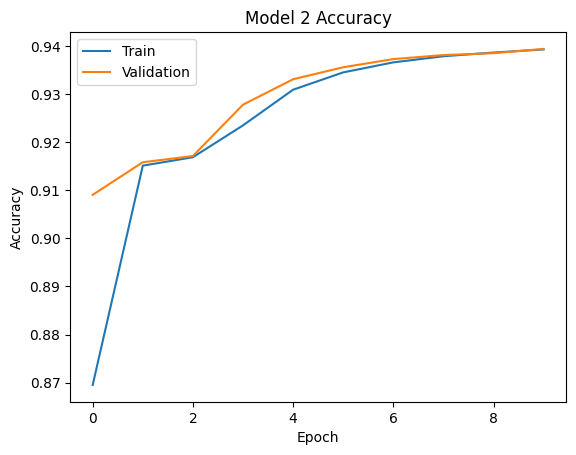

In [ ]:
# Plotting accuracy for Model 2
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

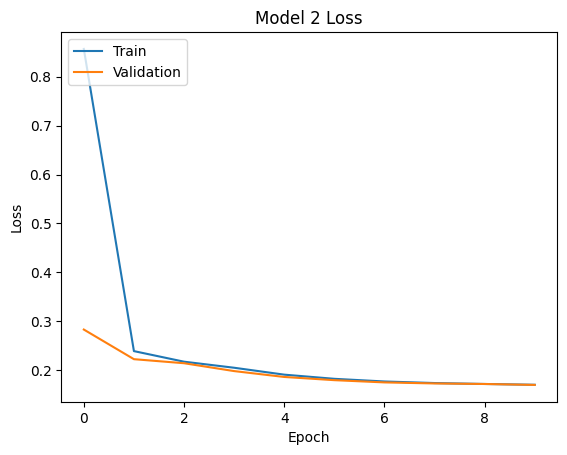

In [ ]:
# Plotting loss for Model 2
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

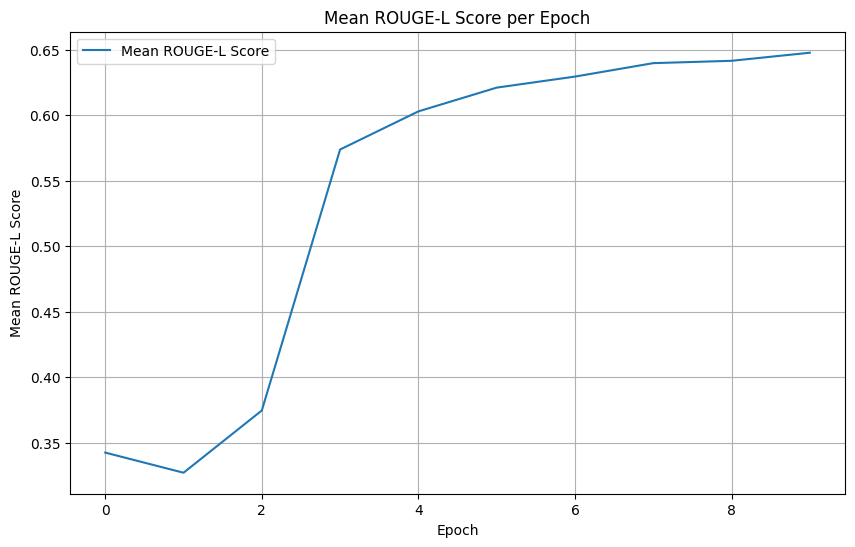

In [ ]:
# Access the logged mean ROUGE-L scores
mean_rouge_l_scores = history_model_2.history['mean_rouge_l']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_rouge_l_scores, label='Mean ROUGE-L Score')
plt.title('Mean ROUGE-L Score per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean ROUGE-L Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


input_sequences = input_sequences_padded[:10]

predictions_model_2 = model_2.predict(input_sequences)
predicted_classes_model_2 = np.argmax(predictions_model_2, axis=-1)

predicted_labels_model_2 = [''.join([dssp8_tokenizer.index_word.get(i, '') for i in pred]) for pred in predicted_classes_model_2]

true_labels = df['dssp8'][:10].tolist()

for i, (true, pred) in enumerate(zip(true_labels, predicted_labels_model_2)):
    print(f"Entry {i+1}:")
    print(f"True Labels: {true}")
    print(f"Predicted Labels: {pred}")
    print("-" * 50)


1/1 [==============================] - 0s 64ms/step
Entry 1:
True Labels: CEEEEEEHHHHHHHHHHHHHHSCSCCSSTTTTEEEEEECSSEEEEEEECSSEEEEEEEECEEESCCCEEEEHHHHHHHHHHCCSSEEEEEEETTEEEEEETTEEEEEECCCGGGSPPPCCCCCCCEEEEHHHHHHHHHHHGGGCCTTCSSGGGGEEEEEEETTEEEEEEESSSSEEEEEEECBCCCCCEEEEHHHHHHHHHHCCSSEEEEEECSSEEEEECSSEEEEEECCCSPPPCGGGGSCCCCCEEEEEEHHHHHHHHHHHHTTSCTTTTTEEEEEEETTEEEEEEECSSEEEEEEEECEEEESCSEEEEEEEHHHHHHHHTTCCSEEEEEESCTTSCEEEEEGGGGGGEEEEEPPPC
Predicted Labels: ccceeeeeeeecttceeeeeeectccssceeeeeeeeecttceeeetceeeeeeeeeccteeccttteeeceeeeeeeeetttteeeeeeettceeeeeetsceeeeettceeeecpcccctceeeeettsceeeeeeeeeehhhhhhheeeeeeeeeetttceeeeeeetteeeeeeecctttctceeeectcccheeeeeehttceeeeeetteeeechhhhhhhhhhhttccctteeecctcheeeeechhhhhhhhhhhhhhhhhttttteeeeeeetthhehhhhtctccccceeeeettcchhhhhhhhhhhheeeetcccctchhheettcscceeeeeettttceeeeeeecc
--------------------------------------------------
Entry 2:
True Labels: CEEEEEEEEEEEEEEEEPTTCCEEEEEGGGGGCTTTSSTTCHHHHHHHHHHCSSCEEEEESGGGGSEEECTTCCCCTTGGGCCCPPPCSSSPPPPEEECHHHHHHHHHHHH

## Model 3 - Ensemble Model Harmonized Sequence Predictor


In [ ]:
from tensorflow.keras.models import Model

model_1_features = Model(inputs=model_1.input, outputs=model_1.layers[-2].output)

model_2_features = Model(inputs=model_2.input, outputs=model_2.layers[-2].output)

In [ ]:
print("Original Model 1 Summary:")
model_1.summary()

print("\nOriginal Model 2 Summary:")
model_2.summary()

print("\nModified Model 1 Features Output Shape:")
print(model_1_features.output_shape)

print("\nModified Model 2 Features Output Shape:")
print(model_2_features.output_shape)


Original Model 1 Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1723, 64)          1728      
                                                                 
 bidirectional (Bidirection  (None, 1723, 128)         66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 1723, 10)          1290      
                                                                 
Total params: 69066 (269.79 KB)
Trainable params: 69066 (269.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Original Model 2 Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddin

In [ ]:
import numpy as np
import tensorflow as tf

dummy_input = np.random.randint(0, high=len(aa_tokenizer.word_index) + 1, size=(10, max_seq_length))

features_1 = model_1_features.predict(dummy_input)
features_2 = model_2_features.predict(dummy_input)

print("Features Model 1 Shape:", features_1.shape)
print("Features Model 2 Shape:", features_2.shape)

concatenated_features = np.concatenate([features_1, features_2], axis=-1)
print("Concatenated Features Shape:", concatenated_features.shape)


1/1 [==============================] - 1s 779ms/step
Features Model 1 Shape: (10, 1723, 128)
Features Model 2 Shape: (10, 1723, 128)
Concatenated Features Shape: (10, 1723, 256)


In [ ]:
from tensorflow.keras.layers import Input, Lambda, average
from tensorflow.keras.models import Model

input_layer = Input(shape=(max_seq_length,), dtype='int32')

output_model_1 = model_1(input_layer)
output_model_2 = model_2(input_layer)

averaged_outputs = average([output_model_1, output_model_2])

ensemble_model = Model(inputs=input_layer, outputs=averaged_outputs)

ensemble_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

ensemble_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1723)]               0         []                            
                                                                                                  
 sequential (Sequential)     (None, 1723, 10)             69066     ['input_3[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 1723, 10)             69066     ['input_3[0][0]']             
                                                                                                  
 average_5 (Average)         (None, 1723, 10)             0         ['sequential[0][0]',          
                                                                     'sequential_1[0][0]'] 

In [ ]:
print("Input Train Shape:", input_train.shape)
print("Input Validation Shape:", input_val.shape)

Input Train Shape: (14984, 1723)
Input Validation Shape: (3747, 1723)


In [ ]:
tf.random.set_seed(42)

callbacks_ensemble_model = setup_callbacks(
    val_dataset,
    dssp8_tokenizer=dssp8_tokenizer,
    initial_lr=0.0001,
    warmed_lr=0.001,
    warmup_epochs=5
)

history_ensemble_model = ensemble_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=callbacks_ensemble_model
)


Epoch 1/10
1/1 [==============================] - 0s 76ms/step

Epoch 1, Mean ROUGE-L: 0.6466202146565226
235/235 [==============================] - 76s 296ms/step - loss: 0.1684 - accuracy: 0.9402 - val_loss: 0.1686 - val_accuracy: 0.9400 - mean_rouge_l: 0.6466
Epoch 2/10
1/1 [==============================] - 0s 114ms/step

Epoch 2, Mean ROUGE-L: 0.6511370684795665
235/235 [==============================] - 71s 303ms/step - loss: 0.1674 - accuracy: 0.9406 - val_loss: 0.1671 - val_accuracy: 0.9406 - mean_rouge_l: 0.6511
Epoch 3/10
1/1 [==============================] - 0s 127ms/step

Epoch 3, Mean ROUGE-L: 0.6607229376284454
235/235 [==============================] - 71s 303ms/step - loss: 0.1660 - accuracy: 0.9412 - val_loss: 0.1654 - val_accuracy: 0.9413 - mean_rouge_l: 0.6607
Epoch 4/10
1/1 [==============================] - 0s 115ms/step

Epoch 4, Mean ROUGE-L: 0.6639038857722501
235/235 [==============================] - 72s 305ms/step - loss: 0.1640 - accuracy: 0.9420 - val_loss

In [ ]:
ensemble_model.save('ensemble_model.h5')
files.download('ensemble_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

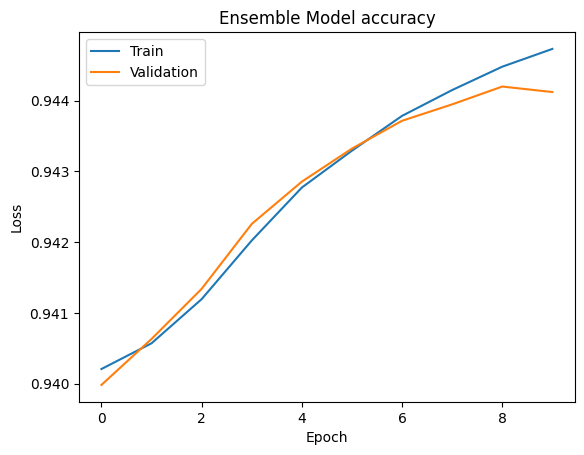

In [ ]:
plt.plot(history_ensemble_model.history['accuracy'])
plt.plot(history_ensemble_model.history['val_accuracy'])
plt.title('Ensemble Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

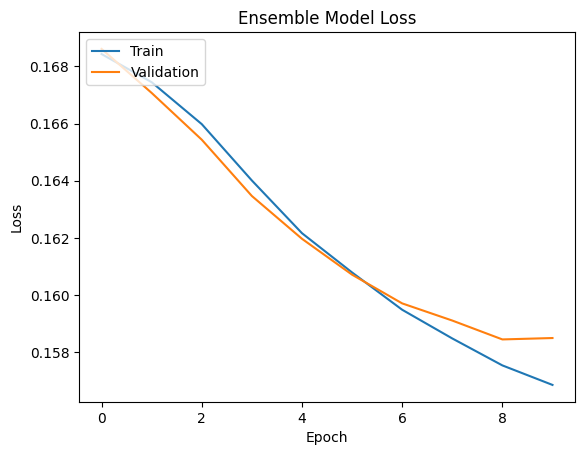

In [ ]:
# Plotting loss for Model 2
plt.plot(history_ensemble_model.history['loss'])
plt.plot(history_ensemble_model.history['val_loss'])
plt.title('Ensemble Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

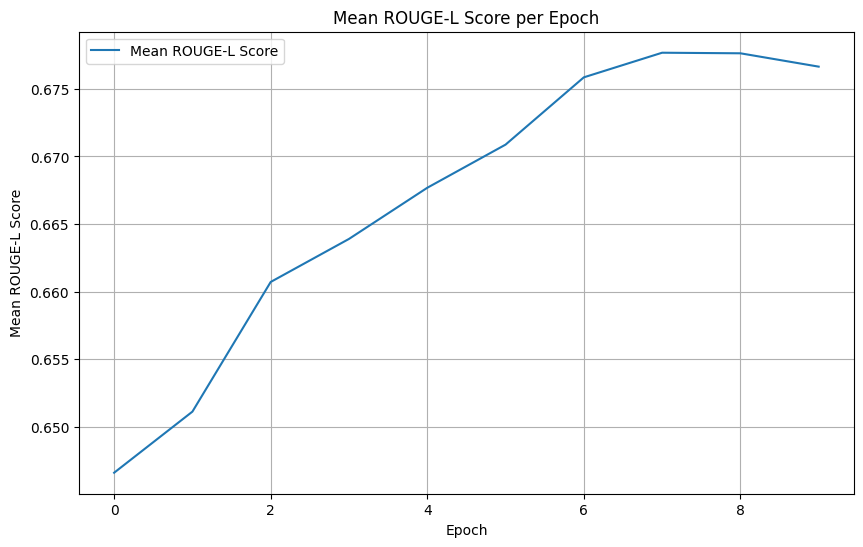

In [ ]:
# Access the logged mean ROUGE-L scores
mean_rouge_l_scores = history_ensemble_model.history['mean_rouge_l']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_rouge_l_scores, label='Mean ROUGE-L Score')
plt.title('Mean ROUGE-L Score per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean ROUGE-L Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Making predictions with the ensemble model
predictions_ensemble = ensemble_model.predict(input_sequences)
predicted_classes_ensemble = np.argmax(predictions_ensemble, axis=-1)

# Converting class indices back to labels for the ensemble model predictions
predicted_labels_ensemble = [''.join([dssp8_tokenizer.index_word.get(i, '') for i in pred]) for pred in predicted_classes_ensemble]

# True labels for the first 10 entries
true_labels = df['dssp8'][:10].tolist()

for i, (true, pred) in enumerate(zip(true_labels, predicted_labels_ensemble)):
    print(f"Entry {i+1}:")
    print(f"True Labels: {true}")
    print(f"Predicted Labels: {pred}")
    print("-" * 50)


1/1 [==============================] - 0s 83ms/step
Entry 1:
True Labels: CEEEEEEHHHHHHHHHHHHHHSCSCCSSTTTTEEEEEECSSEEEEEEECSSEEEEEEEECEEESCCCEEEEHHHHHHHHHHCCSSEEEEEEETTEEEEEETTEEEEEECCCGGGSPPPCCCCCCCEEEEHHHHHHHHHHHGGGCCTTCSSGGGGEEEEEEETTEEEEEEESSSSEEEEEEECBCCCCCEEEEHHHHHHHHHHCCSSEEEEEECSSEEEEECSSEEEEEECCCSPPPCGGGGSCCCCCEEEEEEHHHHHHHHHHHHTTSCTTTTTEEEEEEETTEEEEEEECSSEEEEEEEECEEEESCSEEEEEEEHHHHHHHHTTCCSEEEEEESCTTSCEEEEEGGGGGGEEEEEPPPC
Predicted Labels: ccceeeeeeeecttceeeeeecccssssceeeeeeeeectteeeeeseeeeeeeeeeeccecccttteeecheeeeeeeehttteeeeeeeeteeeeeeetcceeeeeetceeecccccccceeeeeectseeeeeeeeeeeehhhhheeeeeeteeeeettceeeeeeetteeeeeeeccttstsceeeeccschhheehehtttceeeeeetteeeeeeseeeeeeeeettccctgeeecctteeeeeecchhhhhhhhhhheeeecttttteeeeeeetteeeeeettctceceeeeeeettcchhhhhhhhhhhhhehhhcccctceeeeeescscheeeeehttsseeeeeeeecc
--------------------------------------------------
Entry 2:
True Labels: CEEEEEEEEEEEEEEEEPTTCCEEEEEGGGGGCTTTSSTTCHHHHHHHHHHCSSCEEEEESGGGGSEEECTTCCCCTTGGGCCCPPPCSSSPPPPEEECHHHHHHHHHHHH

In [ ]:
import numpy as np

def ensemble_predictions(model_1, model_2, model_3, inputs):

    pred1 = model_1.predict(inputs)
    pred2 = model_2.predict(inputs)
    pred3 = model_3.predict(inputs)


    avg_pred = (pred1 + pred2 + pred3) / 3.0
    return avg_pred


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def get_labels_and_predictions(val_dataset, model1, model2, model3):
    all_actual_labels = []
    all_predicted_labels = []

    for inputs, labels in val_dataset:

        ensemble_pred = ensemble_predictions(model1, model2, model3, inputs)


        predicted_labels = np.argmax(ensemble_pred, axis=-1).flatten()
        actual_labels = labels.numpy().squeeze().flatten()


        all_actual_labels.extend(actual_labels)
        all_predicted_labels.extend(predicted_labels)

    return np.array(all_actual_labels), np.array(all_predicted_labels)


In [ ]:
all_actual_labels, all_predicted_labels = get_labels_and_predictions(val_dataset, model_1, model_2, ensemble_model)

conf_matrix = confusion_matrix(all_actual_labels, all_predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(all_actual_labels, all_predicted_labels)
print("\nClassification Report:")
print(class_report)


2/2 [==============================] - 0s 70ms/step
Confusion Matrix:
[[5652926       0       0       0       0       0       0       0       0
        0]
 [      0  205764   26502   17541   11869     751     221      22       0
        0]
 [      0   17233  125328   21785    7327    1170      82      68       0
        0]
 [      0   20856   35718   72479   15160    3001     176     524       0
        0]
 [      0   20730   13332   18919   33699    2247     264      79       0
        0]
 [      0   12005   14911   27970   14778    4119     146     254       0
        0]
 [      0    9280    6380    7119    5070     433     370      20       0
        0]
 [      0    1528    2787    7566    1187     304      32     636       0
        0]
 [      0    1439    3274    3313     885     167      16      16       0
        0]
 [      0    2899     687     361     338      16       2       0       0
        0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5652926
           1       0.71      0.78      0.74    262670
           2       0.55      0.72      0.62    172993
           3       0.41      0.49      0.45    147914
           4       0.37      0.38      0.38     89270
           5       0.34      0.06      0.10     74183
           6       0.28      0.01      0.02     28672
           7       0.39      0.05      0.08     14040
           8       0.00      0.00      0.00      9110
           9       0.00      0.00      0.00      4303

    accuracy                           0.94   6456081
   macro avg       0.40      0.35      0.34   6456081
weighted avg       0.94      0.94      0.94   6456081



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Compairing model performances on unseen datasets cb513

In [ ]:
import tensorflow as tf

model_1 = tf.keras.models.load_model('/content/model_1 (1).h5')
model_2 = tf.keras.models.load_model('/content/model_2 (1).h5')
model_ensembled = tf.keras.models.load_model('/content/ensemble_model (1).h5')

In [ ]:
import pandas as pd

new_df_path = '/content/test_secondary_structure_cb513.csv'
new_df = pd.read_csv(new_df_path)

In [ ]:
new_df

,seq,sst3,sst8
0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,CCHHHHHHHHHCCEEEEEECCCCCEEEECCEEEECCCCHHHHHHHH...,CCHHHHHHHHHCCEEEEEECTTSCEEEETTEEEESSSCHHHHHHHH...
1,FKIETTPESRYLAQIGDSVSLTCSTTGCESPFFSWRTQIDSPLNGK...,CEEEEECCCEEEEECCCCEEEEEEEECCCCCEEEEEECCCCCCCCE...,CEEEEESSSEEEEETTCCEEEEEEEESCSSCEEEEEETTCCCCSSE...
2,KQKVINVKEVRLSPTIEEHDFNTKLRNARKFLEKGDKVKATIRFKG...,CCCCCCEEEEEECCCCCHHHHHHHHHHHHHHHHCCCEEEEEEECCC...,CCCCCCEEEEEECTTCCHHHHHHHHHHHHHHHHTTCEEEEEEECCS...
3,SPLPITPVNATCAIRHPCHGNLMNQIKNQLAQLNGSANALFISYYT...,CCCCCCCCCEEHHHCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHH...,CCCCCCCCCEEGGGCCCCCSCHHHHHHHHHHHHHHHHHHHHHHHHH...
4,CDAFVGTWKLVSSENFDDYMKEVGVGFATRKVAGMAKPNMIISVNG...,CHHHCEEEEEEEEECHHHHHHHHCCCHHHHHHHHHHCCEEEEEEEC...,CGGGCEEEEEEEEESHHHHHHHHTCCHHHHHHHHHHCCEEEEEEET...
...,...,...,...
508,LKAGPLLSSEKLIAIGASTGGTEAIRHVLQPLPLSSPAVIITQHMP...,CCCCCCECCCCEEEEEECCCHHHHHHHHHCCCCCCCCEEEEEECCC...,CCCCCCBSSCCEEEEEECTTHHHHHHHHHTTCCTTSCEEEEEECCC...
509,HGGEAHMVPMDKTLKEFGADVQWDDYAQLFTLIKDGAYVKVKPGAQ...,CCCCCCEEEHHHHHHHHCCEEEEECCCCEEEEEECCEEEEECCCCC...,CCCCCCEEEHHHHHHHHTCEEEEETTTTEEEEEETTEEEEECTTCS...
510,AAEEKTEFDVILKAAGANKVAVIKAVRGATGLGLKEAKDLVESAPA...,CCCCCCCEEEEEEECHHHHHHHHHHHHHHHCCCHHHHHHHHHCCCE...,CCCCCCCEEEEEEECGGGHHHHHHHHHHHHCCCHHHHHHHHHTCSE...
511,TKGLVLGIYSKEKEEDEPQFTSAGENFNKLVSGKLREILNISGPPL...,CCEEEEEECCCCCCCCCCCECHHHHHHHHHCCCHHHHHHHHHCCCC...,CCEEEEEECCCCCCCCSCCBCHHHHHHHHHTTTHHHHHHHHHSSCC...


In [ ]:
extracted_df = new_df[['seq', 'sst8']]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

extracted_df['seq'] = extracted_df['seq'].str.upper()
aa_tokenizer = Tokenizer(char_level=True)
dssp8_tokenizer = Tokenizer(char_level=True)

aa_tokenizer.fit_on_texts(extracted_df['seq'])
dssp8_tokenizer.fit_on_texts(extracted_df['sst8'])

input_sequences = aa_tokenizer.texts_to_sequences(extracted_df['seq'])
dssp8_sequences = dssp8_tokenizer.texts_to_sequences(extracted_df['sst8'])

max_seq_length = 1723
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_seq_length, padding='post')
dssp8_sequences_padded = pad_sequences(dssp8_sequences, maxlen=max_seq_length, padding='post')

train_dataset = tf.data.Dataset.from_tensor_slices((input_sequences_padded, np.expand_dims(dssp8_sequences_padded, axis=-1)))

batch_size = 64
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [ ]:
evaluation_results = model_1.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

9/9 [==============================] - 9s 694ms/step - loss: 0.3118 - accuracy: 0.8853
Loss: 0.31177061796188354, Accuracy: 0.8853477835655212


In [ ]:
evaluation_results = model_2.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

9/9 [==============================] - 12s 1s/step - loss: 0.3116 - accuracy: 0.8854
Loss: 0.3115597367286682, Accuracy: 0.8854201436042786


In [ ]:
evaluation_results = model_ensembled.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

9/9 [==============================] - 20s 2s/step - loss: 0.3200 - accuracy: 0.8848
Loss: 0.32001328468322754, Accuracy: 0.8847628235816956



## Compairing model performances on unseen datasets ts115

In [ ]:
import pandas as pd

ts115_path = '/content/test_secondary_structure_ts115.csv'
new_df = pd.read_csv(ts115_path)

In [ ]:
new_df

,seq,sst3,sst8
0,GGGLAPAEVPKGDRTAGSPPRTISPPPCQGPIEIKETFKYINTVVS...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHH...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCSHHHHHHHHHHHHHHHHH...
1,GSLGKRPDAVSQAVSSLQGLSPEQADLVAKLKNGHLSERVLAANKL...,CCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHCCHHHHHHHHHHH...,CCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHSCHHHHHHHHHHH...
2,GEITSVSTACQQLEVFSRVLRTSLATILDGGEENLEKNLPEFAKMV...,CCCCCHHHHHHCHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHH...,CCCCCHHHHHHCHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHH...
3,GPAAAPALDTLPAPTSLVLSQVTSSSIRLSWTPAPRHPLKYLIVWR...,CCCCCCCECCCCCCEEEEEECCCCCCEEEEEECCCCCCCEEEEEEE...,CCCCCCCBSSSCCCEEEEEECCCSSCEEEEEECCSSCCSEEEEEEE...
4,GSAFSNQTYPTIEPKPFLYVVGRKKMMDAQYKCYDRMQQLPAYQGE...,CCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHCCCCCCC...,CCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHSCSCCSS...
...,...,...,...
110,SSLLSRLTQSNQSKDKIIAALAKRNVYKSFAGLYDSKGKNDNTGYD...,CCCCCCCCCCCCHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCC...,CCCCCCCCCCCCHHHHHHHHHHHTTCCSCCTTSSCSCCCCCCCCCC...
111,GYLDTSFYKQCRSILHVVMDLDRDGIFARDPSKLPDYRMIISHPMW...,CCCCCCCHHHHHHHHHHHHHHCCCCCCCCCCCCCCCHHHHCCCCCC...,CCCCCCCHHHHHHHHHHHHHHSTTCTTTSCCTTSTTHHHHCSSCCC...
112,GKKEFLKHEYSPGHWSIDYTRAGTSIAVITVRNKYHYSVILNPTDC...,CCEEECCCCCCCCCCCCCCCCCCCEEEEEEECCCEEEEEEECCCCC...,CCEEECCCCCCTTSTTTSTTTTSCEEEEEEETTTEEEEEEECTTCC...
113,SNAXKYFQIDELTLNAXLRITTIESLTPEQRLELIKAHLLNIKTPS...,CCCCCCCCCCHHHHHHHHHHCCCCCCCHHHHHHHHHHHHHHHHCCC...,CCCCCCCCCCHHHHHHHHHHTTCTTSCHHHHHHHHHHHHHHHHSCC...


In [ ]:
extracted_df = new_df[['seq', 'sst8']]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

extracted_df['seq'] = extracted_df['seq'].str.upper()
aa_tokenizer = Tokenizer(char_level=True)
dssp8_tokenizer = Tokenizer(char_level=True)

aa_tokenizer.fit_on_texts(extracted_df['seq'])
dssp8_tokenizer.fit_on_texts(extracted_df['sst8'])

input_sequences = aa_tokenizer.texts_to_sequences(extracted_df['seq'])
dssp8_sequences = dssp8_tokenizer.texts_to_sequences(extracted_df['sst8'])

max_seq_length = 1723
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_seq_length, padding='post')
dssp8_sequences_padded = pad_sequences(dssp8_sequences, maxlen=max_seq_length, padding='post')

train_dataset = tf.data.Dataset.from_tensor_slices((input_sequences_padded, np.expand_dims(dssp8_sequences_padded, axis=-1)))

batch_size = 64
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


<ipython-input-13-96a53e554217>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['seq'] = extracted_df['seq'].str.upper()


In [ ]:
evaluation_results = model_1.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

2/2 [==============================] - 2s 788ms/step - loss: 0.2657 - accuracy: 0.9034
Loss: 0.26567721366882324, Accuracy: 0.9033889174461365


In [ ]:
evaluation_results = model_2.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

2/2 [==============================] - 2s 812ms/step - loss: 0.2648 - accuracy: 0.9033
Loss: 0.26478201150894165, Accuracy: 0.9032577276229858


In [ ]:
evaluation_results = model_ensembled.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

2/2 [==============================] - 3s 2s/step - loss: 0.2702 - accuracy: 0.9039
Loss: 0.2702198326587677, Accuracy: 0.9039037227630615



## Compairing model performances on unseen datasets casp12

In [ ]:
import pandas as pd

casp12_path = '/content/test_secondary_structure_casp12.csv'
new_df = pd.read_csv(casp12_path)

In [ ]:
new_df

,seq,sst3,sst8
0,MHHHHHHENLYFQSHQGPEVTLITANAEGIEGGKTTIKSRSVDVGV...,CCCCCCCCCCCCCCCCCCEEEEEECCCCCCCCCCCEEEECCEEEEE...,CCCCCCCCCCCCCCCCCCEEEEEESCCTTCCTTTCEEEETTEEEEE...
1,MSAETVNNYDYSDWYENAAPTKAPVEVIPPCDPTADEGLFHICIAA...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHH...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHH...
2,ETGQVAASPSINVALKAAFPSPPYLVELLETAASDNTTIYYSLLDR...,CCCCCCCCCEEEEEEEEEEECCCHHHHHHHHHCCCCHHHHHHHHHH...,CCCCCCCCCEEEEEEEEEEECCCHHHHHHHHHSSSCHHHHHHHHHH...
3,MAHHHHHHMAISPRDEQNRSVDLWFAYKVPKLTKDADSDSASGYEY...,CCCCCCCCCCCCCECCCCCECCEEEEEECCCEEEECCEEEECCCCE...,CCCCCCCCCCCCCBCTTSCBCSEEEEEECCCEEEETTEEEECSCCE...
4,MHHHHHHENLYFQTSIRTEPTYTLYATFDNIGGLKARSPVSIGGVV...,CCCCCCCCCCCCCCCCCCCCEEEEEEECCCCCCCCCCCEEEECCEE...,CCCCCCCCCCCCCCCCCCCCEEEEEEECSCCTTCCTTCEEEETTEE...
5,MGHHHHHHGGSENLYFQGNEDILKASATQSAVAGTYQIQVNSLATS...,CCCCCCCCCCCCCCCCCCCCCCCEEEEECCCCCEEEEEEEEECCEE...,CCCCCCCCCCCCCCCCCCCCCCSEEEEESSCCCEEEEEEEEECCBE...
6,SRGPSNGQSVLENSVQVKETSPRRVSVDPQTGEFVVFDRTLGDVYH...,CCCCCCHHHHHHCCEEEECCEEEEEEECCCCCCEEEEEEEECCEEE...,CCCCSSHHHHHHTCEEEETTEEEEEEECTTTCCEEEEEEEETTEEE...
7,MGAEEEDTAILYPFTISGNDRNGNFTINFKGTPNSTNNGCIGYSYN...,CCCCCCCCCEEEEEECCCCCCCCEEEEEEEECCCCEEEEEEEEEEC...,CCCCCTTTSEEEEEECCSSCCCSEEEEEEEESTTCEEEEEEEEEET...
8,KMAGSIVISKEVRVPVSTSQFDYLVSRIGDQFHSSDMWIKDEVYLP...,CCCEEEEEECCEEEEECHHHHHHHHHHHHCCCCHHHHHHHHHHHHH...,CCCEEEEEETTEEEEECHHHHHHHHHHHHTTCCGGGHHHHHHHHHH...
9,MGASSGSNISASNGSSSPTTIVASNPVDLNAFDRLNVVDPAVGKFR...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...


In [ ]:
extracted_df = new_df[['seq', 'sst8']]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

extracted_df['seq'] = extracted_df['seq'].str.upper()
aa_tokenizer = Tokenizer(char_level=True)
dssp8_tokenizer = Tokenizer(char_level=True)

aa_tokenizer.fit_on_texts(extracted_df['seq'])
dssp8_tokenizer.fit_on_texts(extracted_df['sst8'])

input_sequences = aa_tokenizer.texts_to_sequences(extracted_df['seq'])
dssp8_sequences = dssp8_tokenizer.texts_to_sequences(extracted_df['sst8'])

max_seq_length = 1723
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_seq_length, padding='post')
dssp8_sequences_padded = pad_sequences(dssp8_sequences, maxlen=max_seq_length, padding='post')

train_dataset = tf.data.Dataset.from_tensor_slices((input_sequences_padded, np.expand_dims(dssp8_sequences_padded, axis=-1)))

batch_size = 64
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

<ipython-input-20-96a53e554217>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['seq'] = extracted_df['seq'].str.upper()


In [ ]:
evaluation_results = model_1.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/1 [==============================] - 0s 498ms/step - loss: 0.4494 - accuracy: 0.8350
Loss: 0.44936099648475647, Accuracy: 0.8350054025650024


In [ ]:
evaluation_results = model_2.evaluate(train_dataset)

print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/1 [==============================] - 1s 611ms/step - loss: 0.4464 - accuracy: 0.8355
Loss: 0.4463918209075928, Accuracy: 0.8355028629302979
